In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
file = r"C:\Users\PcLaptop\Desktop\A-PLANET\part1-3_.csv"
df= pd.read_csv(file)      # Load spreadsheet

In [3]:
df.head()

,treatment,mod,participant.code,participant.time_started_utc,player.municipality_home,What is the municipality of your home address?,player.driving_license,Do you have a driver license?,player.access_to_car,Do you own or have access to a car?,...,player.tax_level,I think the overall tax level is too high:,player.Madrid_central,I am in favour of Madrid central:,player.effect_rp,"How do you think road pricing will affect you, from 1 (negative effect) to 7 (positive effect), where 4 is no effect?",player.effect_rp_others,"How do you think the road pricing tax will affect low-income citizens, from 1 (negative effect) to 7 (positive effect), where 4 is no effect?",player.comments,session.code
0,Baseline,1,ooxl8r2l,52:53.9,81.0,Madrid - Centro,1.0,Yes,0.0,I own,...,2.0,2,7.0,7,3.0,3,1.0,1,NaN,uln4i2w2
1,Pollution,2,i6cytpys,27:59.7,85.0,Madrid - Fuencarral - El Pardo,1.0,Yes,1.0,"I do not own, but have access to",...,7.0,7,6.0,6,2.0,2,6.0,6,Creo que una pregunta interesante podría haber...,uln4i2w2
2,Public Services,3,js43i4q6,15:31.7,78.0,Madrid - Arganzuela,1.0,Yes,1.0,"I do not own, but have access to",...,4.0,4,7.0,7,6.0,6,2.0,2,NaN,uln4i2w2
3,Road Pricing,4,wjalnvbm,32:09.6,73.0,Leganés,1.0,Yes,1.0,"I do not own, but have access to",...,2.0,2,4.0,4,2.0,2,1.0,1,NaN,uln4i2w2
4,Social Norm,5,bt4ub78z,24:33.9,3.0,Alamo (El),1.0,Yes,0.0,I own,...,5.0,5,3.0,3,1.0,1,7.0,7,NaN,uln4i2w2


In [4]:
lenght=len(df)

In [5]:
df=df.rename(columns={"player.HH": "High EE High NE","player.HL": "High EE Low NE", "player.LH": "Low EE High NE","player.LL": "Low EE Low NE"})

In [6]:
v=[]
for i in df['player.trip_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    else:
        v.append('Public transport')
df.insert(loc=df1.columns.get_loc('player.trip_mode') + 1, column='Trip_chosen_mode', value=v)

NameError: name 'df1' is not defined

In [ ]:
v=[]
for i in df['player.trip_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    elif (i==5 or i==6 or i==7 or i==10):
        v.append('Light transport')
    else:
        v.append('Public transport')
df.insert(loc=df1.columns.get_loc('player.trip_mode') + 1, column='Trip_mode', value=v)

In [226]:
v=[]
for i in df['player.trip_alternative_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    elif (i==5 or i==6 or i==7 or i==10):
        v.append('Light transport')
    else:
        v.append('Public transport')
df.insert(loc=df1.columns.get_loc('player.trip_alternative_mode') + 1, column='Trip_alt_mode', value=v)

In [227]:
pd.set_option('display.max_columns', None)
df

,treatment,mod,participant.code,participant.time_started_utc,player.municipality_home,What is the municipality of your home address?,player.driving_license,Do you have a driver license?,player.access_to_car,Do you own or have access to a car?,player.car_type,What kind of vehicle do you have access to? If you have access to multiple vehicles choose the one you use the most.,player.buy_car_type,Are you planning to buy a car in the next year?,player.access_to_bike,Do you own or have access to a bike (electric or regular)?,player.access_to_motorbyke,Do you own or have access to a motorbyke?,player.access_to_scooter,Do you own or have access to a e-scooter?,player.employ_status,What is your employment status?,player.municipality_destination,Where is the destination of this trip? (municipality),player.trip_purpose,What is the purpose/destination of this trip?,player.trip_other,player.trip_moment,At what time of the day do you typically travel?,player.trip_mode,By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.,Trip_mode,Trip_chosen_mode,player.mode_other,player.trip_traffic,How are the traffic conditions normally on the trip?,player.trip_time,What is the approximate travel time of this trip (one way)?,player.trip_cost,"What is the approximate cost of this trip (fuel, road tolls, parking, ticket price etc.), one way? If you are traveling by public transport and have a period ticket, please consider the average price per trip.",player.trip_tolls,Do you pay road tolls on your trip?,Trip_alt_mode,player.trip_alternative_mode,"If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?",player.trip_alternative_rate,How would you rate your alternative?,player.trip_alternative_justification,player.inequality_perception,What type of society do you think is Spain today – which diagram comes the closest?,player.inequality_wish,What do you think Spain ought to be like – which would you prefer?,player.income_distribution,How fair do you think the wealth distribution is in your country?,player.SN_car_A,Considering the following transport mode group:,player.EE,EE,What share (in %) of other participants in the survey do you think have chosen one of the transport modes in A for their daily trip?,player.PNB,PNB,"In your opinion, what should the ideal percentage of people using transport modes in A for their daily trip be?",player.NE,NE,What share (in %) of other participants in the survey do you think have mostly chosen option A (answered more than 50%) in the previous question?,player.my_trip,my_trip,"Considering the last year, how often (in %) did you use your chosen transport mode for your daily trip?",player.HH,HH,Imagine that most of the people answering this survey say that they use option A for their daily trip and that most of them think that other people should also use option A. How often (in %) would you use option A in this scenario?,player.HL,HL,Imagine that most of the people answering this survey say that they use option A for their daily trip and that most of them think that other people should use option B. How often (in %) would you use option A in this scenario?,player.LH,LH,Imagine that most of the people answering this survey say that they use option B for their daily trip and that most of them think that other people should use option A. How often (in %) would you use option A in this scenario?,player.LL,LL,Imagine that most of the people answering this survey say that they use option B for their daily trip and that most of them also think that other people should use option B. How often (in %) would you use option A in this scenario?,player.year_born,Which year were you born?,player.gender,How do you identify as?,player.education,What is your highest level of education?,player.income,What is your income per year?,player.family,How many people does your household have including you?,pl

In [7]:
a=df
b=df

for i in range(lenght):
    if a['Trip_chosen_mode'][i]!='Car':
        a=a.drop(i)
#a.index  = np.arange(len(a))
for i in range(lenght):
    if b['Trip_chosen_mode'][i]!='Public transport':
        b=b.drop(i)
#b.index  = np.arange(len(b))

KeyError: 'Trip_chosen_mode'

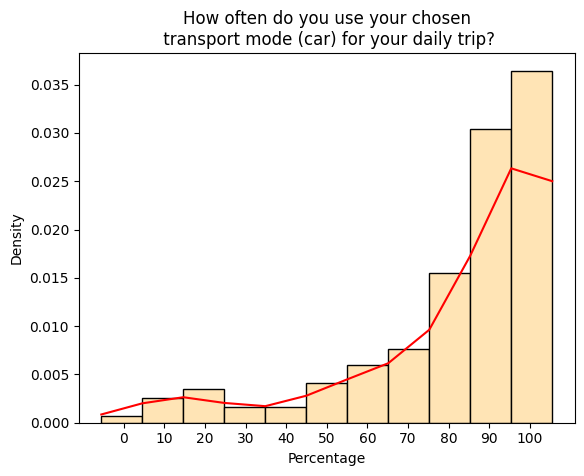

In [8]:
column= 'my_trip'
dens_a = stats.gaussian_kde(a[column])
n, x_a, _ = plt.hist((a[column]), bins=len(a[column].unique()), density=True, label='Set B', color='moccasin', edgecolor='black')
plt.plot(x_a,dens_a(x_a) ,color='r')
#a.groupby([column]).count().plot(kind='bar', y=1, title='', figsize=(4,3),color='moccasin', edgecolor='k', legend=False)
plt.title('How often do you use your chosen\n transport mode (car) for your daily trip?')
plt.xticks([9*i+5 for i in range(11)],[i*10 for i in range(11)])
plt.xlabel('Percentage')
plt.ylabel('Density')
#plt.tight_layout(pad=2, w_pad=8, h_pad=2)
#plt.savefig('my_trip_car_madrid.png')
plt.show()

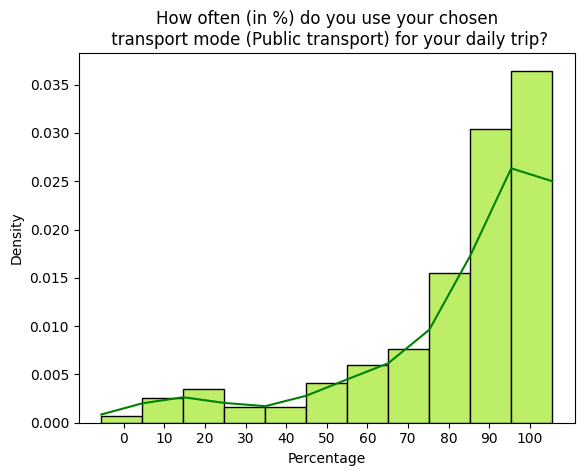

In [9]:
dens_b = stats.gaussian_kde(b[column])
n, x_b, _ = plt.hist((b[column]),bins=len(b[column].unique()), density=True, label='Set B', color='#BCEE68', edgecolor='black')

plt.plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
#a.groupby([column]).count().plot(kind='bar', y=1, title='', figsize=(7,5),color='moccasin', edgecolor='k', legend=False)
plt.title('How often (in %) do you use your chosen\n transport mode (Public transport) for your daily trip?')
plt.xticks([9*i+5 for i in range(11)],[i*10 for i in range(11)])
plt.xlabel('Percentage')
plt.ylabel('Density')
#plt.tight_layout(pad=2, w_pad=8, h_pad=2)
#plt.savefig('my_trip_public_madrid.png')
plt.show()

In [10]:
len(b[column].unique())

11

In [232]:
a=df
b=df

for i in range(len(a)):
    if a['player.SN_car_A'][i]!=1:
        a=a.drop(i)
#a.index  = np.arange(len(a))
for i in range(len(b)):
    if b['player.SN_car_A'][i]!=0:
        b=b.drop(i)
#b.index  = np.arange(len(b))

b[['EE','PNB','NE','HH','HL', 'LH', 'LL']]=b[['EE','PNB','NE','HH','HL', 'LH', 'LL']].apply(lambda x: 100-x)
z=pd.concat([a, b], axis=0).sort_index(axis=0)

In [233]:
a[['EE','PNB','NE','HH','HL', 'LH', 'LL']]

,EE,PNB,NE,HH,HL,LH,LL
0,80,10,60,0,0,0,0
1,30,30,20,0,0,0,0
2,70,20,30,20,30,20,10
3,20,10,10,0,0,0,0
4,70,80,10,70,80,50,10
...,...,...,...,...,...,...,...
466,20,50,70,20,20,20,20
473,40,30,20,60,60,60,60
474,70,50,50,80,80,80,80
475,30,10,20,50,80,80,20


In [234]:
z1=pd.melt(z, id_vars=['treatment','player.SN_car_A','Trip_chosen_mode'], value_vars=['HH','HL', 'LH', 'LL'],var_name='Expectations', value_name='Conditional choice')

In [235]:
z1[z1['player.SN_car_A']==0]

,treatment,player.SN_car_A,Trip_chosen_mode,Expectations,Conditional choice
31,Public Services,0.0,Public transport,HH,0
32,Road Pricing,0.0,Public transport,HH,20
33,Social Norm,0.0,Public transport,HH,20
34,Baseline,0.0,Public transport,HH,10
35,Pollution,0.0,Car,HH,50
...,...,...,...,...,...
1899,Road Pricing,0.0,Public transport,LL,100
1900,Baseline,0.0,Public transport,LL,50
1901,Pollution,0.0,Public transport,LL,0
1902,Pollution,0.0,Car,LL,20


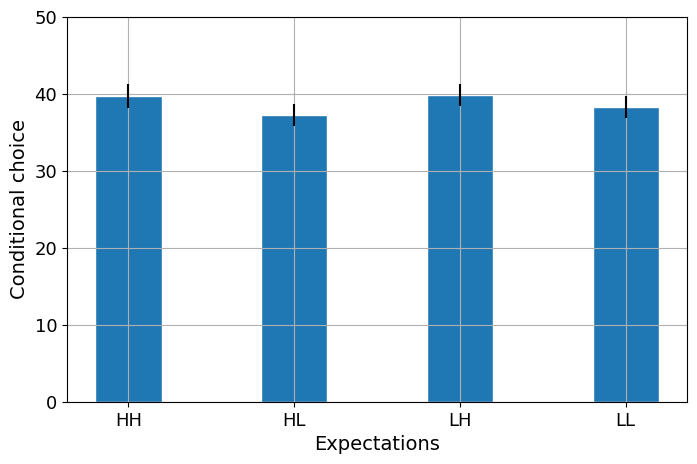

In [237]:
v=[]
errorv=[]

for i in ['HH','HL', 'LH', 'LL']:
    v=np.append(v,z[i].mean())
    errorv=np.append(errorv,z[i].std()/(np.sqrt(len(z[i]))))

fig=plt.figure(figsize=(8,5))
barWidth = 0.5

ind = np.arange(4) 
width = 0.4

plt.bar(ind, v, yerr=errorv, width=width,edgecolor='white')

plt.xticks([r for r in range(4)], ['HH','HL', 'LH', 'LL'], fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Expectations', fontsize=14)
plt.ylabel('Conditional choice', fontsize=14)
plt.ylim([0,50])
#plt.tight_layout(pad=2,w_pad=8, h_pad=3)
plt.grid()
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\cond_choice_tot.png')
plt.show()

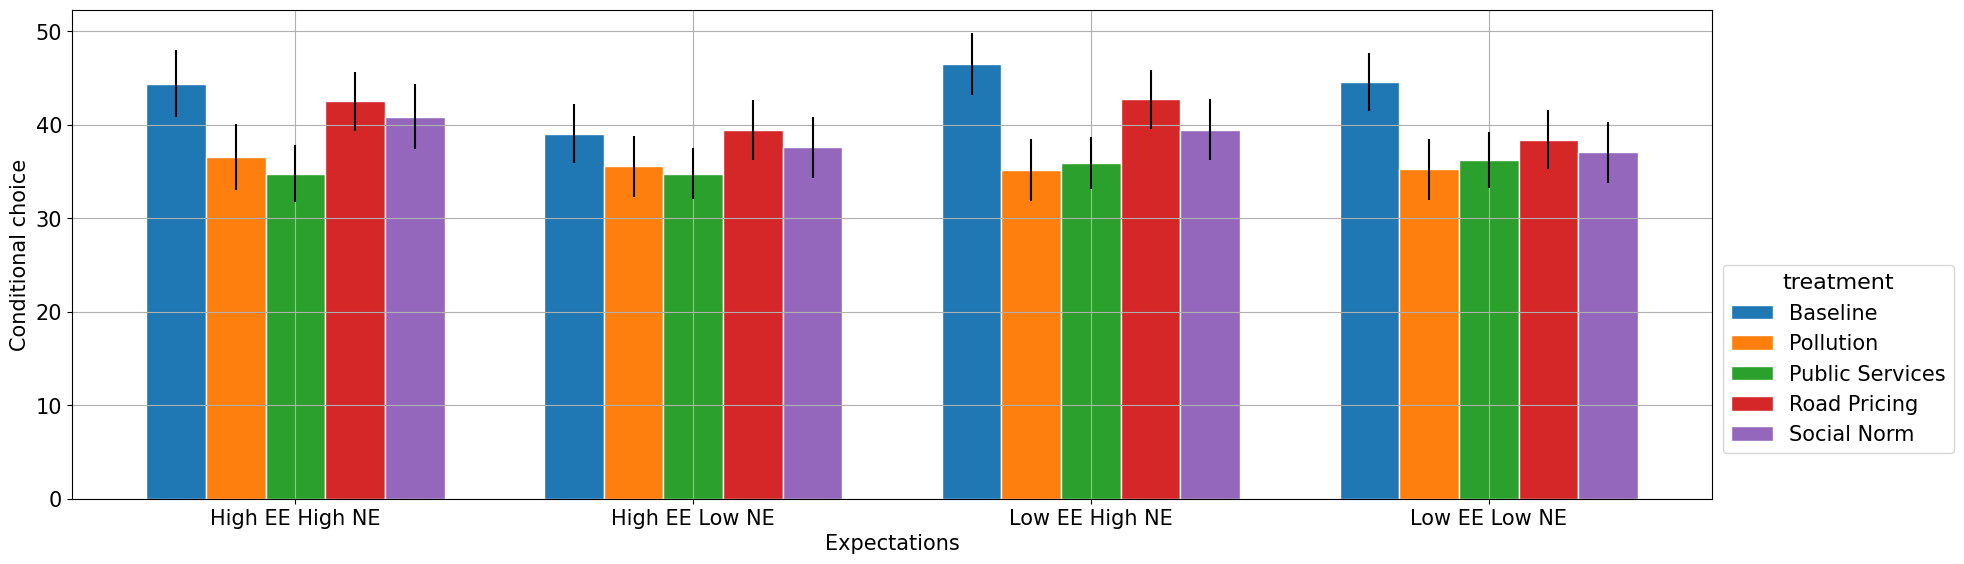

In [238]:
v=[]
w=[]
h=[]
l=[]
k=[]
errorv=[]
errorw=[]
errorh=[]
errorl=[]
errork=[]
for i in ['HH','HL', 'LH', 'LL']:
    v=np.append(v,z[z['treatment']=='Baseline'][i].mean())
    w=np.append(w,z[z['treatment']=='Pollution'][i].mean())
    h=np.append(h,z[z['treatment']=='Public Services'][i].mean())
    l=np.append(l,z[z['treatment']=='Road Pricing'][i].mean())
    k=np.append(k,z[z['treatment']=='Social Norm'][i].mean())
    errorv=np.append(errorv,z[z['treatment']=='Baseline'][i].std()/(np.sqrt(len(z[z['treatment']=='Baseline'][i]))))
    errorw=np.append(errorw,z[z['treatment']=='Pollution'][i].std()/(np.sqrt(len(z[z['treatment']=='Pollution'][i]))))
    errorh=np.append(errorh,z[z['treatment']=='Public Services'][i].std()/(np.sqrt(len(z[z['treatment']=='Public Services'][i]))))
    errorl=np.append(errorl,z[z['treatment']=='Road Pricing'][i].std()/(np.sqrt(len(z[z['treatment']=='Road Pricing'][i]))))
    errork=np.append(errork,z[z['treatment']=='Social Norm'][i].std()/(np.sqrt(len(z[z['treatment']=='Social Norm'][i]))))

fig=plt.figure(figsize=(20,6))
barWidth = 0.2

ind = np.arange(4) 
width = 0.15

plt.bar(ind, v, yerr=errorv, width=width,edgecolor='white', label='Baseline')
plt.bar(ind+width, w,yerr=errorw,  width=width, edgecolor='white', label='Pollution')
plt.bar(ind+2*width, h, yerr=errorh, width=width, edgecolor='white', label='Public Services')
plt.bar(ind+3*width, l,yerr=errorl,  width=width, edgecolor='white', label='Road Pricing')
plt.bar(ind+4*width, k,yerr=errork,  width=width, edgecolor='white', label='Social Norm')

plt.xticks([r + barWidth*3/2 for r in range(4)], ["High EE High NE","High EE Low NE","Low EE High NE","Low EE Low NE"], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Expectations', fontsize=15)
plt.ylabel('Conditional choice', fontsize=15)
#plt.ylim([0,1])
leg=plt.legend(loc='best', bbox_to_anchor=(1, 0.5),fontsize=15)
leg.set_title('treatment',prop={'size':16})
plt.tight_layout(pad=2,w_pad=8, h_pad=3)
plt.grid()
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\cond_choice.png')
plt.show()

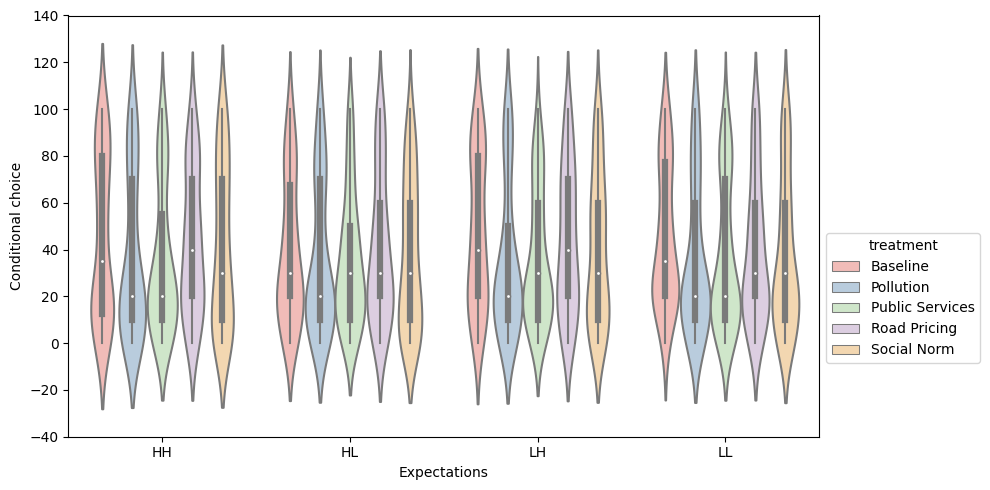

In [242]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Expectations", y="Conditional choice", hue="treatment" , hue_order= ['Baseline', 'Pollution','Public Services','Road Pricing','Social Norm'], data=z1, palette="Pastel1")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='treatment')
plt.ylim([-40,140])
plt.tight_layout()
#plt.savefig('violin_madrid.png')

In [240]:
df1=df
df2=df
df3=df
df4=df

for i in range(len(df)):
    if df1['mod'][i]!=1:
        df1=df1.drop(i)
    if df2['mod'][i]!=2:
        df2=df2.drop(i)
    if df3['mod'][i]!=3:
        df3=df3.drop(i)
    if df4['mod'][i]!=4:
        df4=df4.drop(i)
df1.index  = np.arange(len(df1))
df2.index  = np.arange(len(df2))
df3.index  = np.arange(len(df3))
df4.index  = np.arange(len(df4))

a=[df1,df2,df3,df4]
b=[df1,df2,df3,df4]
for k in range(4):
    for i in range(len(a[k])):
        if a[k]['player.SN_car_A'][i]!=1:
            a[k]=a[k].drop(i)
    a[k].index  = np.arange(len(a[k]))
    for i in range(len(b[k])):
        if b[k]['player.SN_car_A'][i]!=0:
            b[k]=b[k].drop(i)
    b[k].index  = np.arange(len(b[k]))
    
for k in range(4):
    b[k][['EE','PNB','NE','HH','HL', 'LH', 'LL']]=b[k][['EE','PNB','NE','HH','HL', 'LH', 'LL']].apply(lambda x: 100-x)

In [57]:
#nn=df.groupby(['Trip_mode','Trip_alt_mode'])
#chord=nn.size().reset_index(name="Time")
#chord.to_excel("ch_madd.xlsx")

In [241]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\plot madrid\all_Madrid.xlsx"

xl= pd.ExcelFile(file)      # Load spreadsheet
df = xl.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df.index  = np.arange(len(df))
df=df.iloc[:, [202,204,206,208]]

pd.set_option('display.max_columns', None)
df

,player.HH,player.HL,player.LH,player.LL
0,100,100,100,100
1,75,75,75,75
2,1,1,2,20
3,25,25,25,25
4,5,5,5,5
...,...,...,...,...
176,70,80,80,90
177,45,60,35,90
178,95,95,95,95
179,95,95,95,95
